In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import torch

c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [6]:
def goodness(point, good_points, bad_points):
    import math

    closest_good_distance = float("inf")
    for good_point in good_points:
        distance = math.sqrt((point[0] - good_point[0])**2 + (point[1] - good_point[1])**2)
        if distance < closest_good_distance:
            closest_good_distance = distance

    closest_bad_distance = float("inf")
    for bad_point in bad_points:
        distance = math.sqrt((point[0] - bad_point[0])**2 + (point[1] - bad_point[1])**2)
        if distance < closest_bad_distance:
            closest_bad_distance = distance

    return closest_bad_distance - closest_good_distance

def eyes_dataset(n=800):
    rng = np.random.default_rng(42)
    
    # Generate circle points
    x = np.round(rng.uniform(-0.5, 0.5, n)/2, 1)*2
    y = np.round(rng.uniform(-0.5, 0.5, n)/2, 1)*2
    norm = np.sqrt(x**2 + y**2) + 1e-10
    x /= norm
    y /= norm

    # Add noise
    theta = 2 * np.pi * rng.uniform(0, 1, n)
    r = rng.uniform(0, 0.03, n)
    x += r * np.cos(theta)
    y += r * np.sin(theta)

    # Eyes: adding points for two small circles
    for eye_x in [-0.5, 0.5]: # x-coordinates for left and right eyes
        eye_y = 0.5  # y-coordinate (same for both eyes)
        eye_radius = 0.2
        t = 2 * np.pi * rng.uniform(0, 1, n//20)  # divide by 20 to have fewer points for eyes
        eye_points_x = eye_x + eye_radius * np.cos(t)
        eye_points_y = eye_y + eye_radius * np.sin(t)
        x = np.concatenate([x, eye_points_x])
        y = np.concatenate([y, eye_points_y])

    X = np.stack((x, y), axis=1)
    X *= 3
    
    return X.astype(np.float32)

def mouth_dataset(n=800):
    rng = np.random.default_rng(42)
    
    # Generate circle points
    x = np.round(rng.uniform(-0.5, 0.5, n)/2, 1)*2
    y = np.round(rng.uniform(-0.5, 0.5, n)/2, 1)*2
    norm = np.sqrt(x**2 + y**2) + 1e-10
    x /= norm
    y /= norm

    # Add noise
    theta = 2 * np.pi * rng.uniform(0, 1, n)
    r = rng.uniform(0, 0.03, n)
    x += r * np.cos(theta)
    y += r * np.sin(theta)

    # Mouth: adding points for a semi-circle
    mouth_radius = 0.5
    t = np.pi * rng.uniform(0, 1, n//10)  # divide by 10 to have fewer points for mouth
    mouth_points_x = mouth_radius * np.cos(t)
    mouth_points_y = -(0.5 + mouth_radius * np.sin(t) - mouth_radius)  # adjust y to position the mouth correctly
    x = np.concatenate([x, mouth_points_x])
    y = np.concatenate([y, mouth_points_y])

    X = np.stack((x, y), axis=1)
    X *= 3
    
    return X.astype(np.float32)

def get_reward(position, timestep, end_timestep):
  # compute distance to prefered points and disliked points, return average

  good_points = mouth_dataset()
  bad_points = eyes_dataset()

  if timestep == end_timestep:
    return goodness(position, good_points, bad_points)

  return 0

Progress: 0.0%
Progress: 2.0%
Progress: 4.0%
Progress: 6.0%
Progress: 8.0%
Progress: 10.0%
Progress: 12.0%
Progress: 14.0%
Progress: 16.0%
Progress: 18.0%
Progress: 20.0%
Progress: 22.0%
Progress: 24.0%
Progress: 26.0%
Progress: 28.0%
Progress: 30.0%
Progress: 32.0%
Progress: 34.0%
Progress: 36.0%
Progress: 38.0%
Progress: 40.0%
Progress: 42.0%
Progress: 44.0%
Progress: 46.0%
Progress: 48.0%
Progress: 50.0%
Progress: 52.0%
Progress: 54.0%
Progress: 56.0%
Progress: 58.0%
Progress: 60.0%
Progress: 62.0%
Progress: 64.0%
Progress: 66.0%
Progress: 68.0%
Progress: 70.0%
Progress: 72.0%
Progress: 74.0%
Progress: 76.0%
Progress: 78.0%
Progress: 80.0%
Progress: 82.0%
Progress: 84.0%
Progress: 86.0%
Progress: 88.0%
Progress: 90.0%
Progress: 92.0%
Progress: 94.0%
Progress: 96.0%
Progress: 98.0%


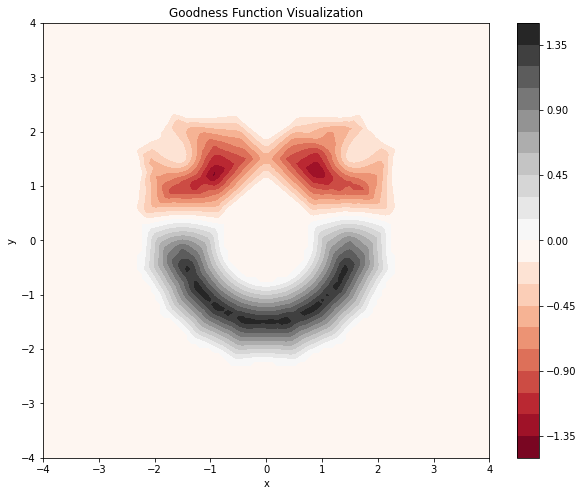

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming this is the black box function
def func(x, y):
    good_points = mouth_dataset()
    bad_points = eyes_dataset()
    # Since I don't have the actual implementation, this is a placeholder.
    # Replace this with the actual goodness function logic.
    return goodness((x, y), good_points, bad_points)

# Create a grid of x and y values
x = np.linspace(-4, 4, t)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Initialize an array for storing results
Z = np.zeros_like(X)

# Compute goodness for each point in the grid
for i, yi in enumerate(y):
    for j, xi in enumerate(x):
        Z[i, j] = func(xi, yi)
    # Print progress every 10 steps
    if i % 5 == 0:
        print(f"Progress: {i/len(y)*100:.1f}%")

# Create a contour plot
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.title('Goodness Function Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
mouth_dataset()

array([[ 2.9630098 , -0.05890843],
       [-0.03220458,  3.036226  ],
       [ 2.6857004 , -1.3249294 ],
       ...,
       [-0.170813  , -1.4902426 ],
       [-0.8733669 , -1.2195206 ],
       [-0.04362394, -1.4993656 ]], dtype=float32)

In [1]:
import json

# Function to load JSON data from a file
def load_json(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

# Load the data from 'trajs.json'
traj_data = load_json('trajs.json')

In [8]:
trajectory_length = len(traj_data[0]["observation"])
trajectory_count = len(traj_data)

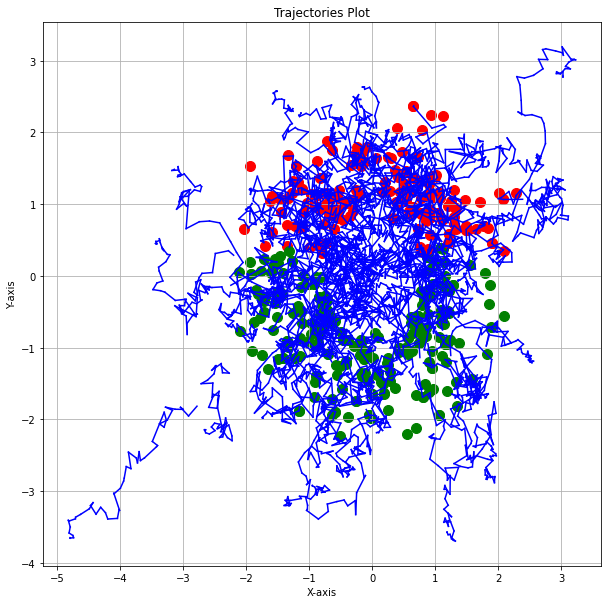

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))  # Set the size of the plot

for traj_idx in range(trajectory_count):
    if traj_idx > 100:
        continue
    for timestep in range(trajectory_length):
        obs = traj_data[traj_idx]["observation"][timestep]
        next_obs = traj_data[traj_idx]["next_obersation"][timestep]
        action = traj_data[traj_idx]["action"][timestep]
        reward = traj_data[traj_idx]["reward"][timestep]

        # Plot a line segment between obs and next_obs
        plt.plot([obs[0], next_obs[0]], [obs[1], next_obs[1]], color='blue')
        
        if reward != 0:
            color = 'green' if reward > 0 else 'red'
            plt.scatter(*next_obs, color=color, s=100)  # s is the size of the marker

for traj_idx in range(trajectory_count):
    if traj_idx > 500:
        continue
    for timestep in range(trajectory_length):
        obs = traj_data[traj_idx]["observation"][timestep]
        next_obs = traj_data[traj_idx]["next_obersation"][timestep]
        action = traj_data[traj_idx]["action"][timestep]
        reward = traj_data[traj_idx]["reward"][timestep]

        # Plot a line segment between obs and next_obs
        
        if reward != 0:
            color = 'green' if reward > 0 else 'red'
            plt.scatter(*next_obs, color=color, s=100)  # s is the size of the marker

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Trajectories Plot')
plt.grid(True)
plt.show()